##### Î∞±ÏóîÎìú ÏΩîÎìú

In [2]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 
data = pd.read_csv('datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
data.head(10)
print(data.shape)

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/1726811543.py:4: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


(2622133, 38)


In [3]:
### Îç∞Ïù¥ÌÑ∞ ÌååÏïÖ

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏù¥ mixed Ïù∏ Ïª¨Îüº : [1, 2, 7, 11, 29] Î≤à Ïß∏ Ïª¨Îüº
columns = data.columns # Ï†ÑÏ≤¥ Ïª¨Îüº
for column in columns:
    print(data[column].apply(type).value_counts())

# mixed Îç∞Ïù¥ÌÑ∞ Î™ÖÎ™Ö 
mixed_columns_index = [1, 2, 7, 11, 29]
mixed_columns_name = data.columns[mixed_columns_index]

# Major Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
for column in mixed_columns_name:
    print(data[column].apply(type).unique())
    print(data[column].apply(type).value_counts())

# Minor Îç∞Ïù¥ÌÑ∞ Ï†ïÏ≤¥ ÌôïÏù∏ 
## 1, 'Health Service Area', 'Hospital County', 'Patient Disposition' -> Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌïÑÏöî
## 2. 'Zip Code - 3 digits' -> ÌôòÏûê Í±∞Ï£ºÏßÄÏó≠ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ -> Drop 
for column in mixed_columns_name:
    not_str_index = data[column].apply(lambda x: type(x) == str)
    print(data[column][~not_str_index].value_counts(dropna=False))


index
<class 'int'>    2622133
Name: count, dtype: int64
Health Service Area
<class 'str'>      2617246
<class 'float'>       4887
Name: count, dtype: int64
Hospital County
<class 'str'>      2617246
<class 'float'>       4887
Name: count, dtype: int64
Operating Certificate Number
<class 'float'>    2622133
Name: count, dtype: int64
Facility ID
<class 'float'>    2622133
Name: count, dtype: int64
Facility Name
<class 'str'>    2622133
Name: count, dtype: int64
Age Group
<class 'str'>    2622133
Name: count, dtype: int64
Zip Code - 3 digits
<class 'str'>      2061890
<class 'int'>       524288
<class 'float'>      35955
Name: count, dtype: int64
Gender
<class 'str'>    2622133
Name: count, dtype: int64
Race
<class 'str'>    2622133
Name: count, dtype: int64
Ethnicity
<class 'str'>    2622133
Name: count, dtype: int64
Length of Stay
<class 'str'>    2523136
<class 'int'>      98997
Name: count, dtype: int64
Type of Admission
<class 'str'>    2622133
Name: count, dtype: int64
Patient Disp

In [4]:
### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - Í≤∞Ï∏°Ïπò Î∞è ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Í∞í Ï≤òÎ¶¨
pd.set_option('display.max_columns', None)

# 'Length of Stay' Ïª¨Îüº Ï≤òÎ¶¨
## Î¨∏ÏûêÏó¥ Îì± ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Í∞íÏùÄ NaNÏúºÎ°ú Î≥ÄÌôò
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')
## NaNÏù¥ Îêú ÌñâÏùÄ Ï†úÍ±∞
df = data.dropna(subset=['Length of Stay'])
## float ‚Üí int Î°ú ÌòïÎ≥ÄÌôò (NaN Ï†úÍ±∞ÎêòÏóàÏúºÎØÄÎ°ú ÏïàÏ†Ñ)
df['Length of Stay'] = df['Length of Stay'].astype(int)

# NaN Í∞úÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏùÄ Ïª¨Îüº Ï†úÍ±∞
## Source of Payment 2, Source of Payment 3, Operating Provider License Number, Other Provider License Number Ïª¨Îüº
nan_columns = df.columns[df.isna().sum() > 10_000]
df = df.drop(columns=nan_columns)

# ÏùòÎØ∏ÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞ 
# 'Zip Code - 3 digits'(Ïö∞Ìé∏Î≤àÌò∏) / 'index'(Ïù∏Îç±Ïä§)
# 'Attending Provider License Number'(Ï£ºÏπòÏùò Î©¥ÌóàÎ≤àÌò∏) / 'Operating Certificate Number'(Ïö¥ÏòÅ Ïù∏Ï¶ù Î≤àÌò∏)
df = df.drop(columns=['Zip Code - 3 digits', 'index', 'Attending Provider License Number', 'Operating Certificate Number'])


# 'Birth Weight' Ïª¨Îüº Ï≤òÎ¶¨ - Ïª¨Îüº ÏÇ≠Ï†ú
df = df.drop(columns=['Birth Weight'])
# # 'Birth Weight' Ïª¨Îüº Ï≤òÎ¶¨ - Birth Weight = 0Ïù∏ Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
# # ÏÇ≠Ï†ú Ï†Ñ Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò
# total_before = len(df)
# # 'Birth Weight' Ïª¨ÎüºÍ∞íÏù¥ 0Ïù∏ Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
# df = df[df['Birth Weight'] != 0]
# # ÏÇ≠Ï†ú ÌõÑ Ï¥ù Îç∞Ïù¥ÌÑ∞ Ïàò
# total_after = len(df)
# # ÏÇ≠Ï†úÎêú Îç∞Ïù¥ÌÑ∞ Ïàò
# deleted_rows = total_before - total_after
# # Í≤∞Í≥º Ï∂úÎ†•
# print(f"ÏÇ≠Ï†ú Ï†Ñ Îç∞Ïù¥ÌÑ∞ Ïàò: {total_before}")
# print(f"ÏÇ≠Ï†ú ÌõÑ Îç∞Ïù¥ÌÑ∞ Ïàò: {total_after}")
# print(f"'Birth Weight' Í∞íÏù¥ 0Ïù∏ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò(ÏÇ≠Ï†úÎêú Ìñâ Ïàò): {deleted_rows}")

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/1815843966.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = df['Length of Stay'].astype(int)


In [40]:
# ### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ 
from packages.category_utils import preview_rare_categories, replace_and_report_rare_categories
from packages.number_utils import plot_zscore_outliers_all, remove_zscore_outliers_all
import pandas as pd

num_columns = ['Total Charges', 'Total Costs', 'Length of Stay']#, 'Birth Weight']
cate_columns = [col for col in df.columns
               if col not in num_columns + ['Patient Disposition']]

# # ÏàòÏπòÌòï Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÍ≥†, Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï©ÎãàÎã§.
# bins = [1000, 1000, 80]#, 100]

# ## 1) Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
# plot_zscore_outliers_all(df, columns=num_columns, bins_list=bins, z_thresh=2)

# ## 2) Ïù¥ÏÉÅÏπò Ï†úÍ±∞
# df_num_clean = remove_zscore_outliers_all(df, columns=num_columns, z_thresh=2)



# # Î≤îÏ£ºÌòï Ïª¨ÎüºÏùò Ïù¥ÏÉÅÏπò Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÍ≥†, Ïù¥ÏÉÅÏπòÎ•º OthersÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.

# ## 1) Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî
# rare_info = preview_rare_categories(df, columns=cate_columns, threshold=0.01)
# print(rare_info)

# ## 2) Ïù¥ÏÉÅÏπò ÎåÄÏ≤¥
# df_cate_clean = replace_and_report_rare_categories(df,cate_columns)

# # df = pd.concat([df_cate_clean, df_num_clean, df['Patient Disposition']], axis=1)

In [43]:
### Î™®Îç∏ ÏÑ†Ï†ï 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# -------------------------------
# ÎåÄÎûµÏ†ÅÏù∏ Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê
# -------------------------------

# -------------------------------
# Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
# -------------------------------
# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - Tree based Î™®Îç∏(DecisionTree, RandomForest, XGBoost Îì±) + Support Vector Î™®Îç∏ 
cat_pipeline = make_pipeline( 
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ - ÎπÑ Tree based Î™®Îç∏(LogisticRegression Îì±)
cat2_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)
# Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
num_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)
# ÌååÏù¥ÌîÑÎùºÏù∏ - Tree based Î™®Îç∏(DecisionTree, RandomForest, XGBoost Îì±) + Support Vector Î™®Îç∏ 
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])
# ÌååÏù¥ÌîÑÎùºÏù∏ - ÎπÑ Tree based Î™®Îç∏(LogisticRegression Îì±)
preprocessor2 = ColumnTransformer([
    ('cat', cat2_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])
# PCA - SVC Î™®Îç∏ÏóêÎßå Ï†ÅÏö©
pca = PCA(n_components=3)
# SMOTE - Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Í∏∞Î≤ï
smote = SMOTE(k_neighbors=3, sampling_strategy=0.3, random_state=42)

# -------------------------------
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# -------------------------------

# Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ°ú Î≥ÄÌôò 
X = df.drop(columns=['Patient Disposition'])

disposition_evasion = [
    "Left Against Medical Advice"
]

# Ïù¥ÌÉàÏù¥Î©¥ 1, ÏïÑÎãàÎ©¥ 0ÏúºÎ°ú Ïù¥ÏßÑÌôî
y = np.where(df['Patient Disposition'].isin(disposition_evasion), 1, 0)

# Îç∞Ïù¥ÌÑ∞ ÏÖã Î∂ÑÌï† 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.01, test_size=0.002, random_state=42, stratify=y)


# -------------------------------
# ÏÇ¨Ïö©Ìï† ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
# -------------------------------
models = {
    'LogisticRegression' : LogisticRegression(),
    'KNNNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    # 'Support Vector Classifier': SVC(probability=True)
}

# -------------------------------
# Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Îä• ÎπÑÍµê
# -------------------------------

results = []
print("="*20, "Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê", "="*20)
for name, model in models.items():

    # Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏
    if name in ['KNNNeighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']:
        pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('model', model)
        ])
    # SVC Î™®Îç∏ - PCA Ï†ÅÏö©
    elif name == 'Support Vector Classifier':
        pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('pca', pca),
        ('model', model)
        ])
    # LogisticRegression Î™®Îç∏ - OneHotEncoding Ï†ÅÏö©
    else:
        pipeline = Pipeline([
        ('preprocessor', preprocessor2),
        ('smote', smote),
        ('model', model)
        ])

    # Î™®Îç∏ ÌïôÏäµ
    pipeline.fit(X_train, y_train)
    # Î™®Îç∏ ÏòàÏ∏°
    y_pred_proba = pipeline.predict_proba(X_test)
    # Threshold : 0.5
    y_pred = np.where(y_pred_proba[:, 1] > 0.5, 1, 0)

    # ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Í≤∞Í≥º Ï†ÄÏû•
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"[{name}] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

==================== Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ====================
[LogisticRegression] Accuracy: 0.9445, Precision: 0.2079, Recall: 0.5526, F1 Score: 0.3022
[KNNNeighbors] Accuracy: 0.9338, Precision: 0.1415, Recall: 0.4035, F1 Score: 0.2096
[Decision Tree] Accuracy: 0.9655, Precision: 0.2624, Recall: 0.3246, F1 Score: 0.2902
[Random Forest] Accuracy: 0.9842, Precision: 1.0000, Recall: 0.2719, F1 Score: 0.4276
[Gradient Boosting] Accuracy: 0.9838, Precision: 0.9677, Recall: 0.2632, F1 Score: 0.4138
[XGBoost] Accuracy: 0.9840, Precision: 0.8571, Recall: 0.3158, F1 Score: 0.4615


In [45]:
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')
results_df

Accuracy  Precision    Recall  F1 Score
Model                                                      
LogisticRegression  0.944466   0.207921  0.552632  0.302158
KNNNeighbors        0.933779   0.141538  0.403509  0.209567
Decision Tree       0.965458   0.262411  0.324561  0.290196
Random Forest       0.984160   1.000000  0.271930  0.427586
Gradient Boosting   0.983779   0.967742  0.263158  0.413793
XGBoost             0.983969   0.857143  0.315789  0.461538

In [22]:
print("Ïù¥ÌÉà ÌôòÏûê Ïàò:", sum(y))
print("Ï†ÑÏ≤¥ ÌôòÏûê Ïàò:", len(y))
print("Ïù¥ÌÉà ÎπÑÏú®: {:.2f}%".format(sum(y)/len(y)*100))


Ïù¥ÌÉà ÌôòÏûê Ïàò: 56929
Ï†ÑÏ≤¥ ÌôòÏûê Ïàò: 2619918
Ïù¥ÌÉà ÎπÑÏú®: 2.17%


In [ ]:
### ÏÑ†Ï†ïÎêú Î™®Îç∏ ÏµúÏ†ÅÌôî 
from packages.get_best_model import get_best_model

# ÌèâÍ∞ÄÏßÄÌëú Ï¥àÍ∏∞Ìôî  
results = []

## Logistic Regression Î™®Îç∏ ÏµúÏ†ÅÌôî
from sklearn.linear_model import LogisticRegression
# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}
logistic_model, logistic_params, logistic_scores = get_best_model('LogisticRegression', \
                                                LogisticRegression(), params, preprocessor2, X_train, y_train)
# ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
results.append({name : 'LogisticRegression', **logistic_scores})
pred_proba_logistic = logistic_model.predict_proba(X_test)

## Random Forest Î™®Îç∏ ÏµúÏ†ÅÌôî
from sklearn.ensemble import RandomForestClassifier
# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
randomforest_model, randomforest_params, randomforest_scores = get_best_model('RandomForestClassifier', \
                                                RandomForestClassifier(), params, preprocessor, X_train, y_train)
# ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
results.append({name : 'RandomForestClassifier', **randomforest_scores})
pred_proba_randomforest = randomforest_model.predict_proba(X_test)

## XGBoost Î™®Îç∏ ÏµúÏ†ÅÌôî
from xgboost import XGBClassifier
# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ÏÑ§Ï†ï
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.5, 0.7, 1.0],
    'model__colsample_bytree': [0.5, 0.7, 1.0]
}
xgb_model, xgb_params, xgb_scores = get_best_model('XGBClassifier',\
                                                XGBClassifier(), params, preprocessor, X_train, y_train)
# ÌèâÍ∞ÄÏßÄÌëú Ï†ÄÏû•
results.append({name : 'XGBClassifier', **xgb_scores})
pred_proba_xgb = xgb_model.predict_proba(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinse

best parameter: {'model__solver': 'saga', 'model__penalty': 'l2', 'model__C': 100}
best score: 0.44322454672245465
Fitting 3 folds for each of 10 candidates, totalling 30 fits
best parameter: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 20}
best score: 0.4427487123881811
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jangjinse

best parameter: {'model__subsample': 0.7, 'model__n_estimators': 100, 'model__max_depth': 7, 'model__learning_rate': 0.2, 'model__colsample_bytree': 0.7}
best score: 0.4512417166791698


In [46]:
results = [{'name': 'LogisticRegression',
  'accuracy': '0.9790',
  'precision': '0.5357',
  'recall': '0.5357',
  'f1': '0.5357'},
 {'name': 'RandomForestClassifier',
  'accuracy': '0.9839',
  'precision': '0.9706',
  'recall': '0.2946',
  'f1': '0.4521'},
 {'name': 'XGBClassifier',
  'accuracy': '0.9833',
  'precision': '0.8085',
  'recall': '0.3393',
  'f1': '0.4780'}]

results_df = pd.DataFrame(results)

results_df = results_df.set_index('name')
results_df


accuracy precision  recall      f1
name                                                     
LogisticRegression       0.9790    0.5357  0.5357  0.5357
RandomForestClassifier   0.9839    0.9706  0.2946  0.4521
XGBClassifier            0.9833    0.8085  0.3393  0.4780

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/133839484.py:28: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/133839484.py:28: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/133839484.py:28: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/133839484.py:28: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/133839484.py:28: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48

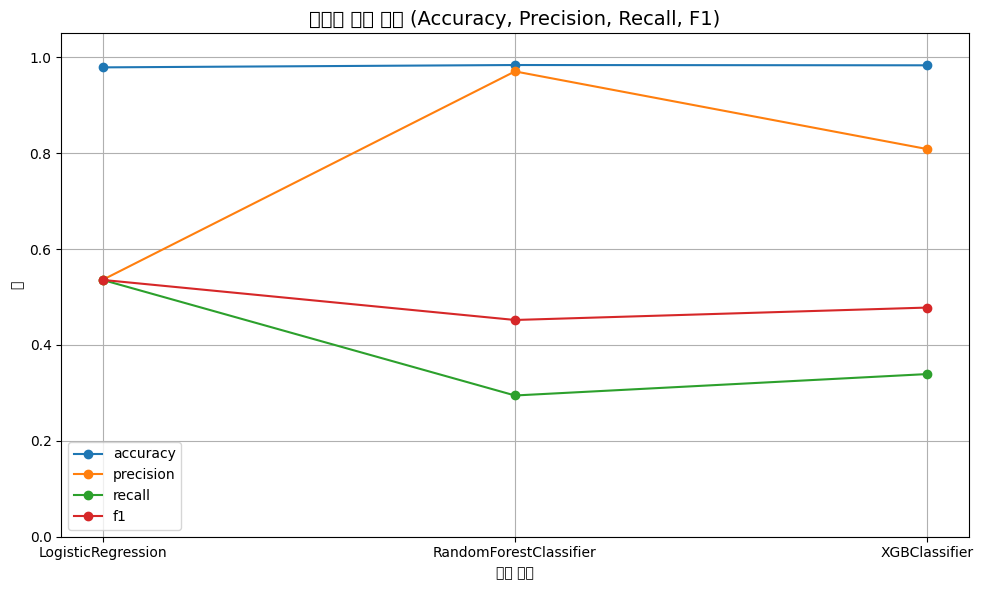

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
results = [
    {'name': 'LogisticRegression', 'accuracy': '0.9790', 'precision': '0.5357', 'recall': '0.5357', 'f1': '0.5357'},
    {'name': 'RandomForestClassifier', 'accuracy': '0.9839', 'precision': '0.9706', 'recall': '0.2946', 'f1': '0.4521'},
    {'name': 'XGBClassifier', 'accuracy': '0.9833', 'precision': '0.8085', 'recall': '0.3393', 'f1': '0.4780'}
]

results_df = pd.DataFrame(results)
results_df.set_index('name', inplace=True)

# Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
results_df = results_df.astype(float)

# Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
# plt.figure(figsize=(10, 6))
# for metric in results_df.columns:
#     plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

# plt.title('Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê (Accuracy, Precision, Recall, F1)', fontsize=14)
# plt.xlabel('Î™®Îç∏ Ïù¥Î¶Ñ')
# plt.ylabel('Í∞í')
# plt.ylim(0, 1.05)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/3690229622.py:43: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/3690229622.py:43: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/3690229622.py:43: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/3690229622.py:43: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/3690229622.py:43: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/i

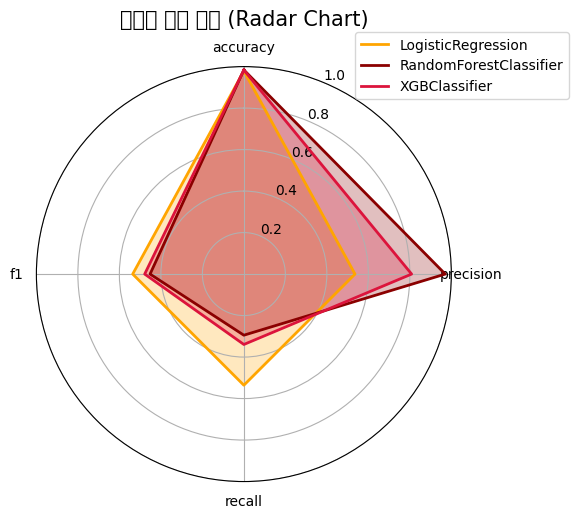

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
results = [
    {'name': 'LogisticRegression', 'accuracy': '0.9790', 'precision': '0.5357', 'recall': '0.5357', 'f1': '0.5357'},
    {'name': 'RandomForestClassifier', 'accuracy': '0.9839', 'precision': '0.9706', 'recall': '0.2946', 'f1': '0.4521'},
    {'name': 'XGBClassifier', 'accuracy': '0.9833', 'precision': '0.8085', 'recall': '0.3393', 'f1': '0.4780'}
]
results_df = pd.DataFrame(results)
results_df = results_df.set_index('name').astype(float)

# Î†àÏù¥ÎçîÏ∞®Ìä∏ ÏÑ§Ï†ï
labels = results_df.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Ï≤´ Ìè¨Ïù∏Ìä∏Î°ú ÎêòÎèåÏïÑÍ∞ÄÍ∏∞

# Ï∞®Ìä∏ Ï¥àÍ∏∞Ìôî
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÏßÄÌëú (Radar Chart)", size=15, y=1.08)

# Í∞Å Î™®Îç∏Î≥ÑÎ°ú plot
colors = ['orange', 'darkred', 'crimson']
for i, (model_name, row) in enumerate(results_df.iterrows()):
    values = row.tolist()
    values += values[:1]  # Ï≤òÏùå Í∞íÏúºÎ°ú ÎêòÎèåÏïÑÍ∞ÄÏÑú Îã´Ìûå ÎèÑÌòï
    ax.plot(angles, values, label=model_name, color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Ï∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Î∞òÏßÄÎ¶Ñ Í∞í Í≥†Ï†ï
ax.set_ylim(0, 1)

# Î≤îÎ°Ä
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


‚úÖ 1. Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∂ÑÏÑù
Î™®Îç∏	Accuracy	Precision	Recall	F1 Score
LogisticRegression	0.9790	0.5357	0.5357	0.5357
RandomForestClassifier	0.9839	0.9706	0.2946	0.4521
XGBClassifier	0.9833	0.8085	0.3393	0.4780

üìå Ï£ºÏöî Ìï¥ÏÑù:

**Ï†ïÌôïÎèÑ(Accuracy)**Îäî Î™®Îëê Îß§Ïö∞ ÎÜíÏßÄÎßå, Ïù¥ÌÉà ÌôòÏûê(ÏÜåÏàò ÌÅ¥ÎûòÏä§) ÏòàÏ∏°Ïù¥ Î™©Ï†ÅÏù¥ÎùºÎ©¥ Îã®ÎèÖÏúºÎ°ú Ïã†Î¢∞ÌïòÍ∏∞ Ïñ¥Î†µÏäµÎãàÎã§.

LogisticRegressionÏùÄ precisionÍ≥º recallÏùò Í∑†ÌòïÏù¥ Í∞ÄÏû• Ï¢ãÍ≥†, f1ÎèÑ Í∞ÄÏû• ÎÜíÏùå.

RandomForestÎäî Ïù¥ÌÉàÌôòÏûêÎ•º ÏûòÎ™ª ÏòàÏ∏°ÌïòÏßÄ ÏïäÏúºÎ†§Îäî Í≤ΩÌñ•Ïù¥ Í∞ïÌï® ‚Üí precisionÏùÄ Îß§Ïö∞ ÎÜíÏßÄÎßå recallÏù¥ ÎÇÆÏùå (ÏÜåÍ∑πÏ†Å ÏòàÏ∏°)

XGBClassifierÎäî Í∑∏ Ï§ëÍ∞Ñ.

‚úÖ 2. Î∞úÌëúÏö© Î™®Îç∏ ÏÑ†Ï†ï Í∏∞Ï§Ä
Î™©Ï†Å	Ï∂îÏ≤ú Î™®Îç∏	Ïù¥Ïú†
üéØ Ïù¥ÌÉà ÌôòÏûê Í≤ÄÏ∂úÎ•†(Recall) Ï§ëÏãú	XGBClassifier	recall 33.9%Î°ú Í∞ÄÏû• ÎÜíÏùå. ÏÇ¨Ï†Ñ Í≤ΩÍ≥† ÏãúÏä§ÌÖúÏóê Ï†ÅÌï©
‚öñÔ∏è Í∑†Ìòï Ïû°Ìûå ÏòàÏ∏°(F1) Ï§ëÏãú	LogisticRegression	precisionÍ≥º recallÏù¥ Í∑†Ìòï Ïû°ÌòÄ ÏûàÍ≥† Ìï¥ÏÑù Ïö©Ïù¥
‚õî Ïò§ÌÉê Ï§ÑÏù¥Í∏∞(Precision) Ï§ëÏãú	RandomForestClassifier	ÎÜíÏùÄ precisionÏúºÎ°ú Î∂àÌïÑÏöîÌïú Ïù¥ÌÉà Í≤ΩÍ≥† Ï§ÑÏûÑ

üí° ÏùòÎ£åÎÇò ÌõÑÏÜçÏ°∞ÏπòÍ∞Ä Ï§ëÏöîÌïú Î∂ÑÏïºÏóêÏÑúÎäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú:

F1-score ÎòêÎäî Recall Ï§ëÏã¨Ïùò ÌèâÍ∞ÄÍ∞Ä Îçî Ï†ÅÏ†àÌï©ÎãàÎã§.


‚úÖ 3. Î∞úÌëúÏö© ÏãúÍ∞ÅÌôî Ï∂îÏ≤ú
üî∑ (1) ÎßâÎåÄÍ∑∏ÎûòÌîÑ / Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ
accuracy, precision, recall, f1ÏùÑ Î™®Îç∏Î≥ÑÎ°ú ÌïúÎààÏóê ÎπÑÍµê Í∞ÄÎä•

ÌòÑÏû¨ Ï∂úÎ†•ÌïòÏã† Í≤ÉÏ≤òÎüº Ï†ïÎüâÏ†ÅÏù∏ ÎπÑÍµêÏóê Îß§Ïö∞ Ìö®Í≥ºÏ†Å
‚Üí ‚ÄúÎ™®Îç∏Î≥ÑÎ°ú ÏÑ±Îä• ÌäπÏÑ±Ïù¥ Îã§Î¶Ñ‚Äù ÏùÑ ÏÑ§Î™Ö Í∞ÄÎä•

üî∑ (2) Î†àÏù¥Îçî Ï∞®Ìä∏
Ìïú Î™®Îç∏Ïùò Îã§Ï§ë ÏÑ±Îä• ÏßÄÌëúÎ•º Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î¨òÏÇ¨
‚Üí ‚ÄúÏñ¥Îñ§ Î™®Îç∏Ïù¥ Í∞ÄÏû• Í∑†Ìòï Ïû°ÌòÄ ÏûàÎäîÍ∞Ä?‚Äù ÏÑ§Î™Ö Ïãú Ìö®Í≥ºÏ†Å

‚úÖ Í≤∞Î°†: Ïñ¥Îñ§ Î™®Îç∏ÏùÑ Ïì∏ Í≤ÉÏù∏Í∞Ä?
üéØ Î∞úÌëú Î™©Ï†ÅÏù¥ "Ïù¥ÌÉà ÌôòÏûêÎ•º ÎÜìÏπòÏßÄ ÏïäÍ∏∞ ÏúÑÌïú ÏÇ¨Ï†Ñ ÌÉêÏßÄ"ÎùºÎ©¥:

‚úÖ Ï∂îÏ≤ú Î™®Îç∏: XGBClassifier

recall 33.9%Îäî Îã§Î•∏ Î™®Îç∏Î≥¥Îã§ ÎÜíÍ≥†,

f1ÎèÑ Îëê Î≤àÏß∏Î°ú ÎÜíÏúºÎ©∞,

precisionÎèÑ 80% ÏàòÏ§ÄÏúºÎ°ú ÎÇòÏÅòÏßÄ ÏïäÏùå

üì£ Î∞úÌëú ÌëúÌòÑ ÏòàÏãú:
‚ÄúÏù¥ÌÉà ÌôòÏûêÎäî ÎÜìÏπòÎ©¥ Ïïà ÎêòÎäî Ï§ëÏöîÌïú Ïù¥Î≤§Ìä∏ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ï†ÑÏ≤¥ Ï†ïÌôïÎèÑÎ≥¥Îã§Îäî Ïù¥ÌÉà ÌôòÏûêÎ•º ÏñºÎßàÎÇò Ïûò Ïû°ÏïÑÎÇ¥ÎäîÍ∞Ä, Ï¶â **Ïû¨ÌòÑÏú®(Recall)**Ïóê ÏßëÏ§ëÌïòÏó¨ Î™®Îç∏ÏùÑ ÏÑ†Ï†ïÌñàÏäµÎãàÎã§. Ïù¥Ïóê Îî∞Îùº ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú XGBoost Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.‚Äù

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/1966055117.py:14: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/1966055117.py:14: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/1966055117.py:14: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/1966055117.py:14: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_48636/1966055117.py:14: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ip

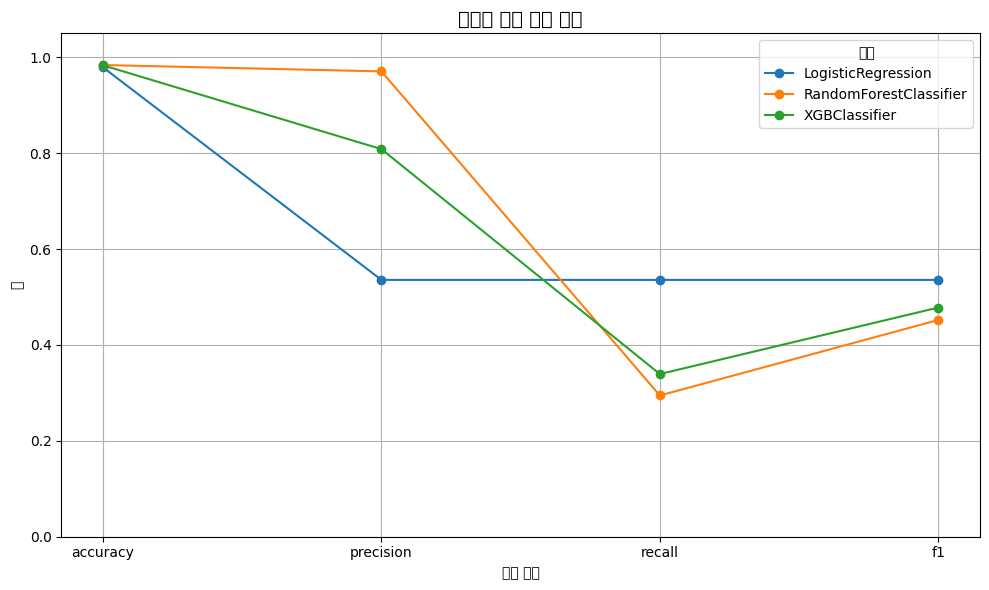

In [48]:
import matplotlib.pyplot as plt

# XÏ∂ïÍ≥º YÏ∂ïÏùÑ Ï†ÑÌôòÌï¥ÏÑú ÌîåÎ°Ø
plt.figure(figsize=(10, 6))
for model in results_df.index:
    plt.plot(results_df.columns, results_df.loc[model], marker='o', label=model)

plt.title('ÏßÄÌëúÎ≥Ñ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê', fontsize=14)
plt.xlabel('ÏÑ±Îä• ÏßÄÌëú')
plt.ylabel('Í∞í')
plt.ylim(0, 1.05)
plt.legend(title='Î™®Îç∏')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# results : accuracy, precision, recall, f1 scoreÍ∞Ä Ìè¨Ìï®Îêú ÎîïÏÖîÎÑàÎ¶¨ Î¶¨Ïä§Ìä∏
# pred_proba_logistic, pred_proba_randomforest, pred_pmroba_xgb : Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†
### Î™®Îç∏Î≥Ñ Í≤∞Í≥º ÏãúÍ∞ÅÌôî - ÌèâÍ∞ÄÏßÄÌëú
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
### Î™®Îç∏Î≥Ñ Í≤∞Í≥º ÏãúÍ∞ÅÌôî - ÌòºÎèôÌñâÎ†¨

In [ ]:
### Î™®Îç∏Î≥Ñ Í≤∞Í≥º ÏãúÍ∞ÅÌôî - PR Curve, ROC Curve

In [ ]:
# ÏµúÏ†Å Î™®Îç∏ Î∂àÎü¨ÏôÄÏÑú predict_proba Ìï¥ÏÑú accuracy, precision, recall, f1 score Îì± ÌèâÍ∞ÄÏßÄÌëú Î≥¥Í≥† ÏãúÍ∞ÅÌôî ÌïòÍ≥† Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•ÍπåÏßÄ Ìï¥ÏïºÎåÄ 